In [1]:
# Importing required modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Changing directory to folder containing all datasets used
import os
os.chdir("C:\\SP\\Year 1 Sem 2\\Programming for Data Analytics (PDAS)\\CA1\\Datasets")

Datasets used:
1. https://tablebuilder.singstat.gov.sg/table/TS/M891321 - Emissions by gas type
2. https://beta.data.gov.sg/collections/1419/view - Surface Air Temperature - Monthly Mean
3. https://beta.data.gov.sg/collections/1399/view - Rainfall - Monthly Total
4. https://tablebuilder.singstat.gov.sg/table/TS/M890081#! - Air Temperature And Sunshine, Relative Humidity And Rainfall
5. https://beta.data.gov.sg/collections/1417/view - Sunshine Duration- Monthly Mean Daily Duration
6. https://beta.data.gov.sg/collections/1398/view - Rainfall - Monthly Number of Rain Days

# How does climate change affect the weather in Singapore?

Finding which years I will be choosing to compare the effects of climate change on the weather of Singapore.

I will be using the amount of greenhouse gas emissions to gauge how serious the climate change is. The higher the greenhouse gas emissions, the worse climate change is in Singapore.

In [2]:
# Importing Greenhouse Gas Emissions By Gas Type data
# Link: https://tablebuilder.singstat.gov.sg/table/TS/M891321
gasEmission = pd.read_csv('M891321.csv')

print("**Greenhouse Gas Emissions By Gas Type**", end="\n")
print("\nThe names of the columns are: ")
for name in gasEmission.columns:
    print(f"- {name} <class - {gasEmission[name].dtypes}>")

print()    
print(gasEmission.head())

print(f"\nThere are {gasEmission.shape[0]} rows and {gasEmission.shape[1]} columns in this dataset")

**Greenhouse Gas Emissions By Gas Type**

The names of the columns are: 
- Data Series <class - object>
- 2021 <class - float64>
- 2020 <class - float64>
- 2019 <class - float64>
- 2018 <class - float64>
- 2017 <class - float64>
- 2016 <class - float64>
- 2015 <class - float64>
- 2014 <class - float64>
- 2013 <class - float64>
- 2012 <class - float64>
- 2011 <class - float64>
- 2010 <class - float64>
- 2009 <class - float64>
- 2008 <class - float64>
- 2007 <class - float64>
- 2006 <class - float64>
- 2005 <class - float64>
- 2004 <class - float64>
- 2003 <class - float64>
- 2002 <class - float64>
- 2001 <class - float64>
- 2000 <class - float64>

                                         Data Series  2021  2020  2019  2018  \
0  Total Greenhouse Gas Emissions (Mt CO2-Equival...  53.7  49.7  51.9  53.3   
1           Carbon Dioxide (CO2) (Mt CO2-Equivalent)  50.1  46.7  49.0  50.3   
2                  Methane (CH4) (Mt CO2-Equivalent)   0.1   0.1   0.1   0.1   
3            Nitrous Oxid

In [3]:
# Selecting the most recent 5 years (2017 - 2021) and creating a copy to prevent changing the original copy

recentGasEmission = gasEmission[['2017', '2018', '2019', '2020', '2021']].copy(deep=True)

Since the the first row of data ("0") represent the total greenhouse gas emissions, I will be using that row to compare the trend of the total greenhouse gas emissions throughout the years.

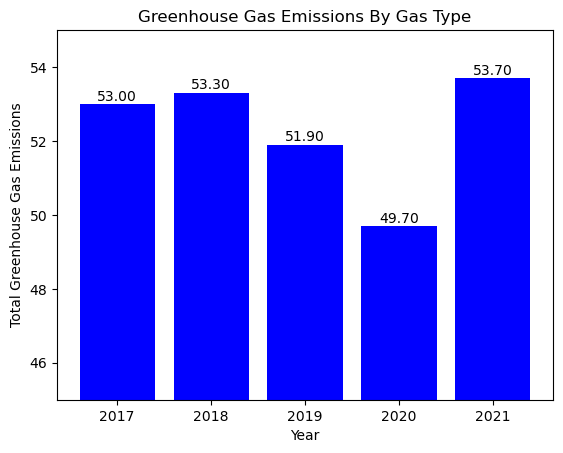

In [4]:
year = recentGasEmission.columns
value = recentGasEmission.iloc[0]

plt.title("Greenhouse Gas Emissions By Gas Type")
plt.xlabel("Year")
plt.ylabel("Total Greenhouse Gas Emissions")

plt.ylim(45, 55)

plt.bar(year, value, color="blue")

for i, value in enumerate(value):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center")

plt.show()

As we can see in the above bar chart showing the total greenhouse gas emissions produced, even though there is a downwards trend from 2018 to 2020, the total greenhouse gas emissions skyrocketed to the peak in these recent 5 years. The reason for the downwards trend from 2018 to 2020 may be because of the outbreak of Covid-19 virus, which forced many countries to go into lockdown, lowered the number of vehicles on the road.

In [5]:
# Importing Greenhouse Gas Emissions By Sector data
# Link: https://tablebuilder.singstat.gov.sg/table/TS/M891491
gasEmissionSector = pd.read_csv('M891491.csv')

print("**Greenhouse Gas Emissions By Sector**", end="\n")
print("\nThe names of the columns are: ")
for name in gasEmissionSector.columns:
    print(f"- {name} <class - {gasEmissionSector[name].dtypes}>")

print()    
print(gasEmissionSector.head())

print(f"\nThere are {gasEmissionSector.shape[0]} rows and {gasEmissionSector.shape[1]} columns in this dataset")

**Greenhouse Gas Emissions By Sector**

The names of the columns are: 
- Data Series <class - object>
- 2021 <class - float64>
- 2020 <class - float64>

                     Data Series  2021  2020
0      Primary Emissions - Power  39.2  39.8
1   Primary Emissions - Industry  44.4  44.4
2  Primary Emissions - Transport  14.2  13.7
3  Primary Emissions - Buildings   0.9   0.8
4  Primary Emissions - Household   0.4   0.5

There are 13 rows and 3 columns in this dataset


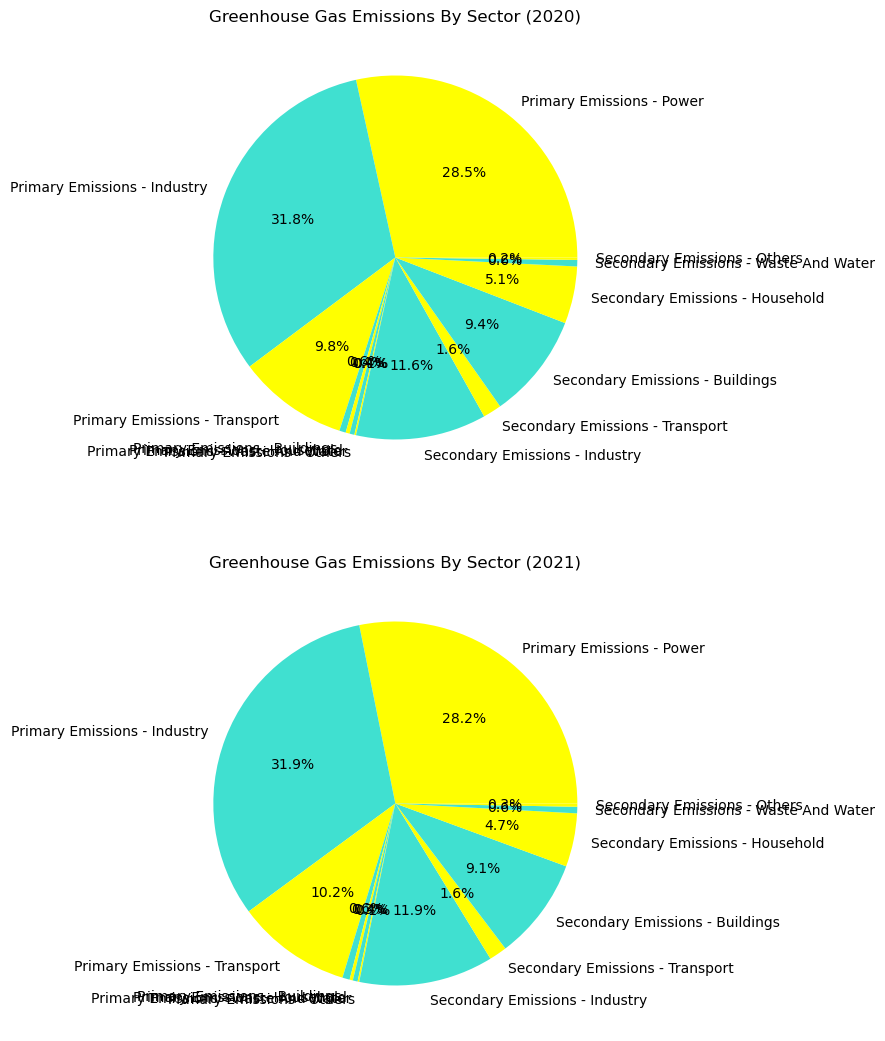

In [6]:
# Initiating a figure to store the pie charts
fig, (ax1, ax2) = (
    plt.subplots(2, 1, figsize=(20, 13))
)

# ----- 2020 -----
labels = gasEmissionSector["Data Series"]
values = gasEmissionSector["2020"]
explode = (0, 0.1, 0, 0)

ax1.pie(values, 
        labels=labels,
        autopct='%1.1f%%',
        colors=['Yellow', 'Turquoise'])

ax1.set_title("Greenhouse Gas Emissions By Sector (2020)")

# ----- 2021 -----
labels_2021 = gasEmissionSector["Data Series"]
values_2021 = gasEmissionSector["2021"]

ax2.pie(values_2021, 
        labels=labels_2021,
        autopct='%1.1f%%',
        colors=['Yellow', 'Turquoise'])

ax2.set_title("Greenhouse Gas Emissions By Sector (2021)")

plt.show()

I will be comparing the years 2020 and 2021 as out of the 5 years, they have the largest difference in greenhouse gas emissions and it will give a better comparison to what the effects of climate change would be on the weather of Singapore.

Even though some of the labels on the pie chart are overlapping due to the fact that there are so many labels with a extremely small portion of the whole data, we can see that the 3 same major sectors that contribute to the total greenhouse gas emissions are:
   1. Industry
   2. Power
   3. Transport

with only a slight difference between the percentages when comparing 2020 and 2021.

## Air Pollutant - Particulate Matter PM 2.5

In [7]:
# Importing Air Pollutant (Particulate Matter PM2.5) data
# Link: https://beta.data.gov.sg/collections/1369/view
airPollutants = pd.read_csv('AirPollutantParticulateMatterPM2.5.csv')

print("**Air Pollutant Particlulate Matters**", end="\n")
print("\nThe names of the columns are: ")
for name in airPollutants.columns:
    print(f"- {name} <class - {airPollutants[name].dtypes}>")

print()    
print(airPollutants.head())

print(f"\nThere are {airPollutants.shape[0]} rows and {airPollutants.shape[1]} columns in this dataset")

**Air Pollutant Particlulate Matters**

The names of the columns are: 
- year <class - int64>
- pm2.5_mean <class - int64>

   year  pm2.5_mean
0  2002          23
1  2003          19
2  2004          21
3  2005          21
4  2006          23

There are 21 rows and 2 columns in this dataset


Finding out whether the total amount of greenhouse gases emitted has a relationship with the amount of air pollutants in the air of Singapore

In [8]:
# Dropping the year that are not present in the airPollutantsYear Dataframe
airPollutantsYear = airPollutants[airPollutants['year'] < 2022]

# Setting the index of airPollutants to use 'year'
airPollutantsYear = airPollutantsYear.set_index('year')


# Flip the columns
airPollutantsYear = airPollutantsYear.iloc[::-1]

print(airPollutantsYear.shape)


# Dropping the years that are not present in the gasEmission Dataframe
droppedGasEmission = gasEmission.drop(columns=['2000', '2001'], axis=0)

# Setting the index 
droppedGasEmission = droppedGasEmission.set_index('Data Series')

# Transpose the columns 
droppedGasEmission = droppedGasEmission.transpose()

print(droppedGasEmission[['Total Greenhouse Gas Emissions (Mt CO2-Equivalent)']].shape)

(20, 1)
(20, 1)


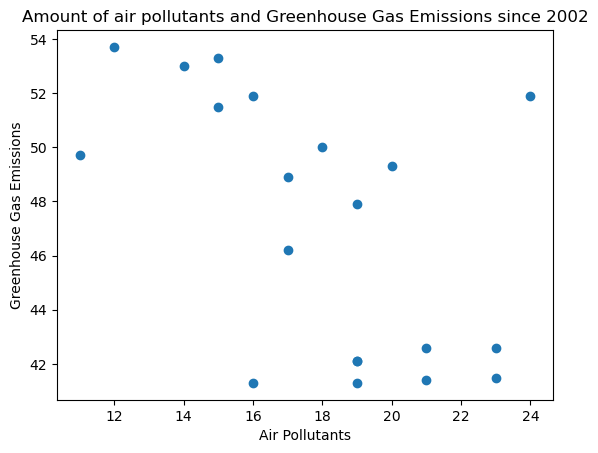

In [9]:
x = airPollutantsYear
y = droppedGasEmission[['Total Greenhouse Gas Emissions (Mt CO2-Equivalent)']]

plt.scatter(x, y)

plt.title("Amount of air pollutants and Greenhouse Gas Emissions since 2002")
plt.xlabel("Air Pollutants")
plt.ylabel("Greenhouse Gas Emissions")


plt.show()

After plotting the scatter plot of air pollutant and greenhouse gas emissions since 2002, we can observe that the points are scattered all over the place, which suggests that there is no linear relationship between the 2 variables. Thus, I can conclude that the 2 variables don't impact one another.

# Comparing the weather of 2020 and 2021 in Singapore 

## Mean Surface Temperature (Line Chart)

In [10]:
# Importing Surface Air Temperature By Gas Type data
# Link: https://beta.data.gov.sg/collections/1419/view 
meanSurfaceTemp = pd.read_csv('SurfaceAirTemperatureMonthlyMean.csv')

print("**Surface Air Temperature Monthly Mean**", end="\n")
print("\nThe names of the columns are: ")
for name in meanSurfaceTemp.columns:
    print(f"- {name} <class - {meanSurfaceTemp[name].dtypes}>")

print()    
print(meanSurfaceTemp.head())

print(f"\nThere are {meanSurfaceTemp.shape[0]} rows and {meanSurfaceTemp.shape[1]} columns in this dataset")

**Surface Air Temperature Monthly Mean**

The names of the columns are: 
- month <class - object>
- mean_temp <class - float64>

     month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0

There are 501 rows and 2 columns in this dataset


In [11]:
meanSurfaceTempCopy = meanSurfaceTemp.copy(deep=True)
# Creating a copy to avoid touching the original dataset

meanSurfaceTempCopy['month'] = pd.to_datetime(meanSurfaceTempCopy['month'])
# Convert the 'month' column to datetime format

meanSurfaceTempCopy['year'] = meanSurfaceTempCopy['month'].dt.year
# Extracting the year from the new datetime formatted 'month' column


meanSurfaceTempCopy_2020 = meanSurfaceTempCopy[meanSurfaceTempCopy['year'] == 2020].reset_index()
# Filtering the mean surface temperatures that are in the year 2020


meanSurfaceTempCopy_2021 = meanSurfaceTempCopy[meanSurfaceTempCopy['year'] == 2021].reset_index()
# Filtering the mean surface temperatures that are in the year 2021

In [22]:
meanSurfaceTempCopy_2020

,index,month,mean_temp,year
0,456,2020-01-01,27.7,2020
1,457,2020-02-01,27.9,2020
2,458,2020-03-01,28.6,2020
3,459,2020-04-01,28.9,2020
4,460,2020-05-01,28.9,2020
5,461,2020-06-01,28.1,2020
6,462,2020-07-01,27.9,2020
7,463,2020-08-01,28.3,2020
8,464,2020-09-01,27.5,2020
9,465,2020-10-01,28.3,2020


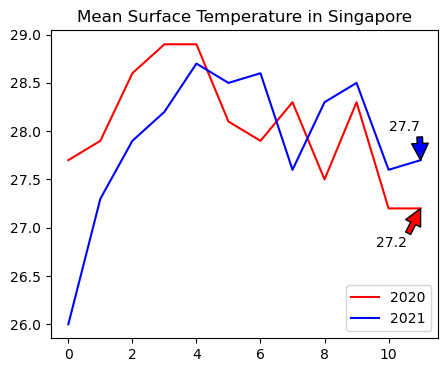

In [12]:
# Initiating a figure
plt.figure(figsize=(5,4))

# Initiating the line charts for 2020 and 2021
plt.plot(meanSurfaceTempCopy_2020['mean_temp'],
         label = '2020',
         color="red")

plt.plot(meanSurfaceTempCopy_2021['mean_temp'],
         label = '2021',
         color="blue")

# Setting the title for the Line Chart
plt.title('Mean Surface Temperature in Singapore')

# Labelling the last value of the year
plt.annotate('27.2', xy=(11, 27.2), xytext=(9.6, 26.8),
            arrowprops={'facecolor':'red'})
plt.annotate('27.7', xy=(11, 27.7), xytext=(10, 28),
            arrowprops={'facecolor':'blue'})

plt.legend()
plt.show()

After plotting the graphs above, we can see the differences between the trends of the mean surface temperature in Singapore for both of the years.

- Shape of graph 
- Peak of graph
- Last value of the year
- Overall (optional)

## Rainfall 

### Rainfall - Monthly Total (Boxplot)

In [13]:
# Importing Rainfall Monthly Total data
# Link: https://beta.data.gov.sg/collections/1399/view 
totalRainfall = pd.read_csv('RainfallMonthlyTotal.csv')

print("**Rainfall Monthly Total**", end="\n")
print("\nThe names of the columns are: ")
for name in totalRainfall.columns:
    print(f"- {name} <class - {totalRainfall[name].dtypes}>")

print()    
print(totalRainfall.head())

print(f"\nThere are {totalRainfall.shape[0]} rows and {totalRainfall.shape[1]} columns in this dataset")

**Rainfall Monthly Total**

The names of the columns are: 
- month <class - object>
- total_rainfall <class - float64>

     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

There are 501 rows and 2 columns in this dataset


Measuring Rainfall is recorded with a rain gauge, which determines the depth of precipitation that occurs over a unit area. One millimeter of measured rainfall is equivalent to one litre of rainfall per square metre.

In [14]:
totalRainfallCopy = totalRainfall.copy(deep=True)
# Creating a copy to avoid touching the original dataset

totalRainfallCopy['month'] = pd.to_datetime(totalRainfallCopy['month'])
# Convert the 'month' column to datetime format

totalRainfallCopy['year'] = totalRainfallCopy['month'].dt.year
# Extracting the year from the new datetime formatted 'month' column


totalRainfallCopy_2020 = totalRainfallCopy[totalRainfallCopy['year'] == 2020].reset_index()
# Filtering the Total Rainfall Copy that are in the year 2020


totalRainfallCopy_2021 = totalRainfallCopy[totalRainfallCopy['year'] == 2021].reset_index()
# Filtering the Total Rainfall Copy that are in the year 2021

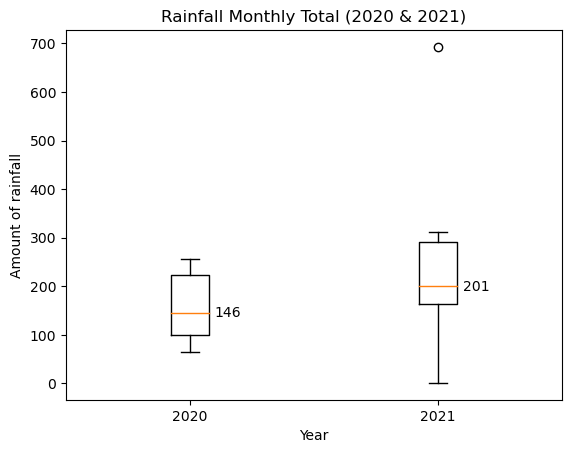

In [15]:
# Initializing the boxplot
boxplot = plt.boxplot([totalRainfallCopy_2020['total_rainfall'], 
                       totalRainfallCopy_2021['total_rainfall']],
            labels=["2020", "2021"])

# Setting the titles and labels of the boxlplot
plt.title("Rainfall Monthly Total (2020 & 2021)")
plt.xlabel("Year")
plt.ylabel("Amount of rainfall")

# Setting the labels for the medians
plt.text(1.1, 138, 
        f"{totalRainfallCopy_2020['total_rainfall'].median():.0f}", 
        ha='left')
plt.text(2.1, 190, 
        f"{totalRainfallCopy_2021['total_rainfall'].median():.0f}", 
        ha='left')

plt.show()

After plotting boxplots for rainfall monthly total for both years 2020 and 2021, we can observe the differences between the rainfall monthly total for both years side-by-side.

- Median
- Range
- Fences
- Outliers (optional)

### Rainfall - Monthly Number of Rain Days (Histogram)

In [16]:
# Importing Rainfall Monthly Number of Rain Days data
# Link: https://beta.data.gov.sg/collections/1398/view
totalRainfallDays = pd.read_csv('RainfallMonthlyNumberofRainDays.csv')

print("**Total Rainfall Days**", end="\n")
print("\nThe names of the columns are: ")
for name in totalRainfallDays.columns:
    print(f"- {name} <class - {totalRainfallDays[name].dtypes}>")

print()    
print(totalRainfallDays.head())

print(f"\nThere are {totalRainfallDays.shape[0]} rows and {totalRainfallDays.shape[1]} columns in this dataset")

**Total Rainfall Days**

The names of the columns are: 
- month <class - object>
- no_of_rainy_days <class - int64>

     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10

There are 501 rows and 2 columns in this dataset


In [17]:
totalRainfallDaysCopy = totalRainfallDays.copy(deep=True)
# Creating a copy to avoid touching the original dataset

totalRainfallDaysCopy['month'] = pd.to_datetime(totalRainfallDaysCopy['month'])
# Convert the 'month' column to datetime format

totalRainfallDaysCopy['year'] = totalRainfallDaysCopy['month'].dt.year
# Extracting the year from the new datetime formatted 'month' column


totalRainfallDaysCopy_2020 = totalRainfallDaysCopy[totalRainfallDaysCopy['year'] == 2020].reset_index()
# Filtering the Total Rainfall Days Copy that are in the year 2020


totalRainfallDaysCopy_2021 = totalRainfallDaysCopy[totalRainfallDaysCopy['year'] == 2021].reset_index()
# Filtering the Total Rainfall Days Copy that are in the year 2021

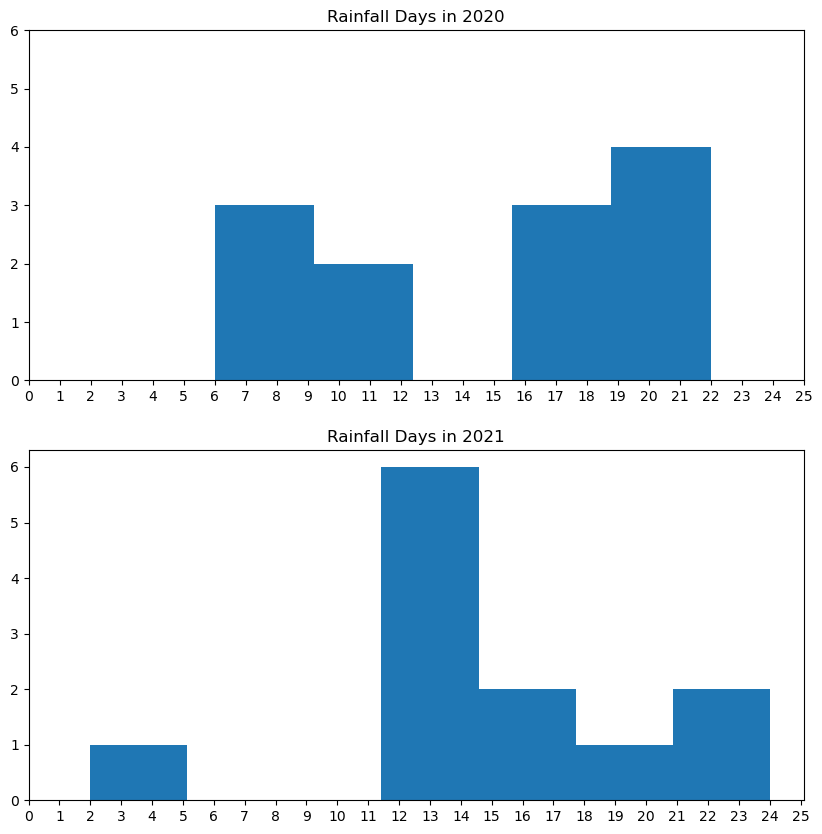

In [18]:
# Initiating a figure to store the Histograms
fig, (ax1, ax2) = (
    plt.subplots(2, 1, figsize=(10, 10))
)

# ----- 2020 -----
ax1.hist(totalRainfallDaysCopy_2020['no_of_rainy_days'],
        bins='auto')

ax1.set_title("Rainfall Days in 2020")

# ----- 2021 -----
ax2.hist(totalRainfallDaysCopy_2021['no_of_rainy_days'],
        bins='auto')

ax2.set_title("Rainfall Days in 2021")


ax1.set_xticks(range(0, 26))
ax2.set_xticks(range(0, 26))

ax1.set_yticks(range(0, 7))
ax2.set_yticks(range(0, 7))

plt.show()

Even though the histograms only have 12 values (representing the 12 months) for both plots, we still can observe a difference between the frequency distribution of the data set.
- 2020 more spread out with no peak
- 2021 has a more distinct peak and is positively-skewed

## Sunshine Duration (Line Chart)

In [19]:
# Importing Rainfall Monthly Total data
# Link: https://beta.data.gov.sg/collections/1417/view
sunDuration = pd.read_csv('SunshineDurationMonthlyMeanDailyDuration.csv')

print("**Sunshine Duration Monthly Mean Daily Duration**", end="\n")
print("\nThe names of the columns are: ")
for name in sunDuration.columns:
    print(f"- {name} <class - {sunDuration[name].dtypes}>")

print()    
print(sunDuration.head())

print(f"\nThere are {sunDuration.shape[0]} rows and {sunDuration.shape[1]} columns in this dataset")

**Sunshine Duration Monthly Mean Daily Duration**

The names of the columns are: 
- month <class - object>
- mean_sunshine_hrs <class - float64>

     month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8

There are 501 rows and 2 columns in this dataset


In [20]:
sunDurationCopy = sunDuration.copy(deep=True)
# Creating a copy to avoid touching the original dataset

sunDurationCopy['month'] = pd.to_datetime(sunDurationCopy['month'])
# Convert the 'month' column to datetime format

sunDurationCopy['year'] = sunDurationCopy['month'].dt.year
# Extracting the year from the new datetime formatted 'month' column


sunDurationCopy_2020 = sunDurationCopy[sunDurationCopy['year'] == 2020].reset_index()
# Filtering the Total Rainfall Copy that are in the year 2020


sunDurationCopy_2021 = sunDurationCopy[sunDurationCopy['year'] == 2021].reset_index()
# Filtering the Total Rainfall Copy that are in the year 2021

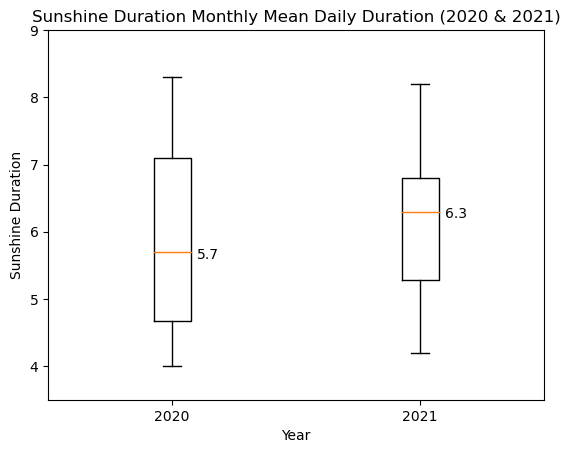

In [21]:
# Initializing the boxplot
sun_boxplot = plt.boxplot([sunDurationCopy_2020['mean_sunshine_hrs'], 
                       sunDurationCopy_2021['mean_sunshine_hrs']],
            labels=["2020", "2021"])

# Setting the titles and labels of the boxlplot
plt.title("Sunshine Duration Monthly Mean Daily Duration (2020 & 2021)")
plt.xlabel("Year")
plt.ylabel("Sunshine Duration")

# Setting the labels for the medians
plt.text(1.1, 5.6, 
        f"{sunDurationCopy_2020['mean_sunshine_hrs'].median():.1f}", 
        ha='left')
plt.text(2.1, 6.2, 
        f"{sunDurationCopy_2021['mean_sunshine_hrs'].median():.1f}", 
        ha='left')

plt.ylim(3.5,9)

plt.show()

Comparing the Sunshine Duration Monthly Mean Daily Duration for both years 2020 and 2021, we can observe:
- 2020 has a bigger interquartile range compared to 2021
- 2020 is more positively-skewed
- The range for both years are approximately around the same